### 1.  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob



### 2. Display the current workin directory using os.getcwd()

In [3]:
print(os.getcwd())

data_dir = r'K:\UMBC\DS 690_01\Assignment7\CollegeScorecard_Raw_Data'




C:\Users\user


### 3. os library has a method call listdir which generates a list of files in a directory/folder.

In [4]:
files  = os.listdir(data_dir)
# files = glob.glob("/CollegeScorecard_Raw_Data/*.csv")

print(files)



['.DS_Store', 'Crosswalks.zip', 'data.yaml', 'FieldOfStudyData1415_1516_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2018_19_PP.csv']


### 4. Removing unwanted files and filtering files based on Yearly data files

In [5]:
filtered_files = [file for file in files if 'MERGED' in file]
print(filtered_files)


['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2018_19_PP.csv']


### 5. Loading the required columns and using "usecols"

In [6]:
df_list = []
def read(file):
    df = pd.read_csv(data_dir+file,usecols=['UNITID','INSTNM','STABBR','REGION','ADM_RATE','TUITIONFEE_IN'])
    year = file.split('_')[0].replace('MERGED','')
    df['year'] = year
    df_list.append(df)


for file in filtered_files:
    read(file)


In [8]:
df_concatenated = pd.concat(df_list)

### 6. Exploring new Dataframe

In [9]:
df_concatenated.shape

(163331, 7)

In [10]:
df_concatenated.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [11]:
df_concatenated.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [12]:
df_concatenated.isnull().any()

UNITID           False
INSTNM           False
STABBR           False
REGION            True
ADM_RATE          True
TUITIONFEE_IN     True
year             False
dtype: bool

### 7. Retrieving data of UMBC

In [68]:
umbc_df = df_concatenated.loc[df_concatenated['INSTNM'] == 'University of Maryland-Baltimore County']

### 8. Exploring ta of UMBC

In [69]:
umbc_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [70]:
umbc_df.shape

(23, 7)

In [71]:
umbc_df.isnull().any()

UNITID           False
INSTNM           False
STABBR           False
REGION           False
ADM_RATE          True
TUITIONFEE_IN     True
year             False
dtype: bool

### 9. Plotting UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

<AxesSubplot:xlabel='year'>

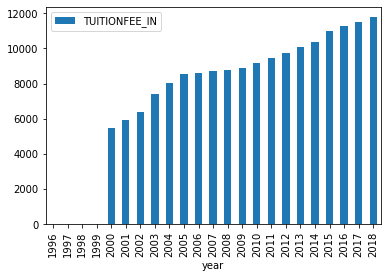

In [72]:
umbc_df.plot.bar(x='year',y='TUITIONFEE_IN')

### 10. Plotting UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

<AxesSubplot:xlabel='year'>

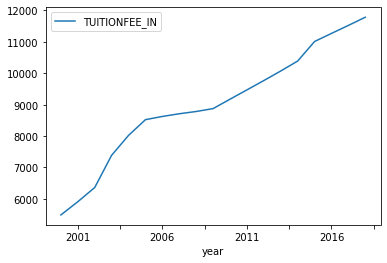

In [73]:
umbc_df.plot.line(x='year',y='TUITIONFEE_IN')

### 11. Converting the TUITIONFEE_IN column to a Python List to calculate change in %

In [74]:
tution_changes = umbc_df['TUITIONFEE_IN'].tolist()


#####  Calculating percentage change in each year

In [75]:
changes = [0]
for i in range(1,len(tution_changes)):
    change = (tution_changes[i]-tution_changes[i-1])/tution_changes[i-1]
    changes.append(change*100)

In [76]:
changes

[0,
 nan,
 nan,
 nan,
 nan,
 7.650273224043716,
 7.648054145516074,
 16.12700408676517,
 8.554412560909583,
 6.234413965087282,
 1.1971830985915493,
 0.9974483878450475,
 0.8268259072117593,
 1.0478359908883828,
 3.370153291253381,
 3.227565151019518,
 3.1372134783986483,
 3.11347808275297,
 3.1386571315057608,
 5.989984591679507,
 2.344175904052335,
 2.254971590909091,
 2.2573363431151243]

##### Rounding up the percentage change to 2 decimal points

In [77]:
rounded = []
for i in changes:
        rounded.append(round(i,2))
        

In [78]:
rounded

[0,
 nan,
 nan,
 nan,
 nan,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

##### Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")

In [79]:
umbc_df['PCT_CHANGE'] = rounded

<ipython-input-79-6b7878c88286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umbc_df['PCT_CHANGE'] = rounded


##### Plotting tuition growth rate year over year - bar first, then line chart

<AxesSubplot:xlabel='year'>

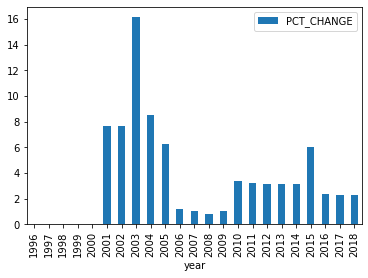

In [80]:
umbc_df.plot.bar(x='year',y='PCT_CHANGE')

<AxesSubplot:xlabel='year'>

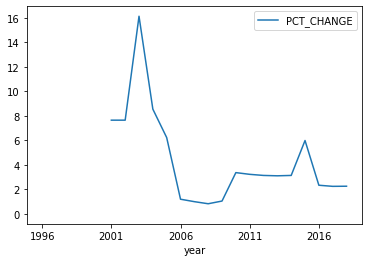

In [81]:
umbc_df.plot.line(x='year',y='PCT_CHANGE')

### 12. Function which takes list of tuitions and return a list of percentage changes year over year

In [46]:
def percent_changes(tuition_changes):
    changes = [0]
    for i in range(1,len(tution_changes)):
        change = (tution_changes[i]-tution_changes[i-1])/tution_changes[i-1]
        changes.append(change*100)
    rounded = []
    for i in changes:
        rounded.append(round(i,2))
    return rounded

### 13. Data of JHU

In [54]:
# jhu_df = df_concatenated.loc[df_concatenated['INSTNM'].str.contains('Hopkins')]

In [56]:
jhu_df = df_concatenated.loc[df_concatenated['INSTNM']=='Johns Hopkins University']

In [57]:
jhu_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000


### 14. Plotting JHU's in-state tuition overtime from 1996 to 2019.

<AxesSubplot:xlabel='year'>

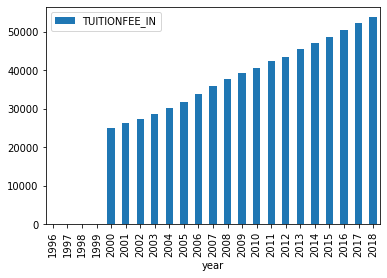

In [58]:
jhu_df.plot.bar(x='year',y='TUITIONFEE_IN')

<AxesSubplot:xlabel='year'>

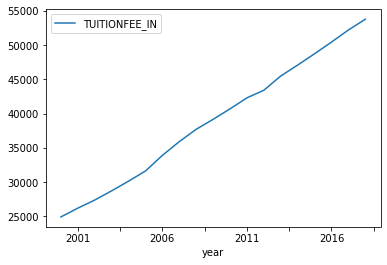

In [59]:
jhu_df.plot.line(x='year',y='TUITIONFEE_IN')

### 15. Let's calculate the JHU tuition percentge growth using the function defined earlier

In [61]:
tution_changes = jhu_df['TUITIONFEE_IN'].tolist()
jhu_changes = percent_changes(tution_changes)

### 16. Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

In [62]:
jhu_df['PCT_CHANGE'] = jhu_changes

<ipython-input-62-cb2fd02cea14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jhu_df['PCT_CHANGE'] = jhu_changes


### 17. Make a bar plot of the JHU percentage changes tuitions over time

<AxesSubplot:xlabel='year'>

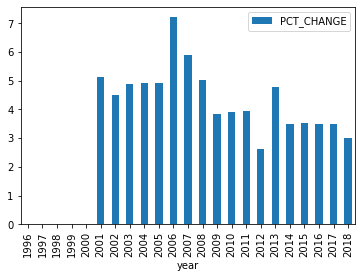

In [63]:
jhu_df.plot.bar(x='year',y='PCT_CHANGE')

<AxesSubplot:xlabel='year'>

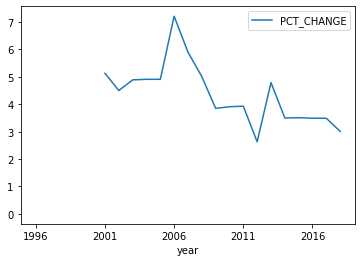

In [65]:
jhu_df.plot.line(x='year',y='PCT_CHANGE')

### 18. Plotting both UMBC and JHU tutuion change over time based on "YEAR"

##### Creating new dataframe of umbc2 based on YEAR

In [82]:
umbc2 = umbc_df[['year']]

In [83]:
umbc2['UMBC_PCT'] = umbc_df['PCT_CHANGE']

<ipython-input-83-33db1a495677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umbc2['UMBC_PCT'] = umbc_df['PCT_CHANGE']


In [84]:
umbc2.head()

,year,UMBC_PCT
2151,1996,0.0
2049,1997,NaN
1982,1998,NaN
1955,1999,NaN
1926,2000,NaN


##### Creating new dataframe of jhu2 based on YEAR

In [85]:
jhu2 = jhu_df[['year']]

In [86]:
jhu2['JHU_PCT'] = jhu_df['PCT_CHANGE']

<ipython-input-86-4af89f7673d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jhu2['JHU_PCT'] = jhu_df['PCT_CHANGE']


In [88]:
jhu2.head()

,year,JHU_PCT
2139,1996,0.0
2039,1997,NaN
1973,1998,NaN
1946,1999,NaN
1917,2000,NaN


##### Merging two dataframes and displaying the new datarame

In [89]:
merged = pd.merge(umbc2,jhu2)

In [90]:
merged.head()

,year,UMBC_PCT,JHU_PCT
0,1996,0.0,0.0
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN


##### Plotting UMBC and JHU on a same plot

##### Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

<AxesSubplot:xlabel='year'>

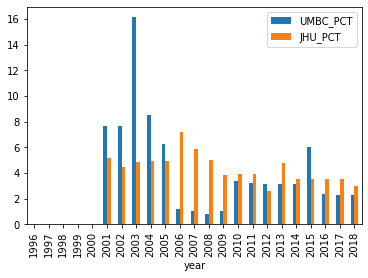

In [91]:
merged.plot.bar(x='year',y=["UMBC_PCT","JHU_PCT"])

##### Plotting them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

<AxesSubplot:xlabel='year'>

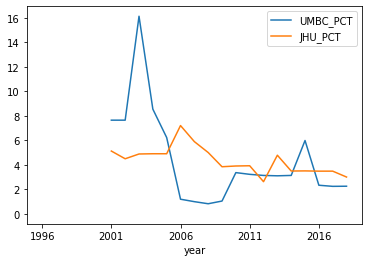

In [92]:
merged.plot.line(x='year',y=["UMBC_PCT","JHU_PCT"])

### 19. Observation:

Based on the observations, the percentage change for UMBC was recorded as highest percentage change (16%) from 1996 to 2019. From 2006 to 20011, change of percentage for UMBC was less than JHU. JHU's percentage change between 3 - 7 percent from 1996 to 2019. In 2015, UMBC's change in percentage was higher than JHU, but it dropped again from 2016 to 2019 when compared to JHU.